In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [5]:
df = pd.read_csv('spam.csv',encoding = 'Windows-1252')

In [6]:
df.head(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [11]:
df['v2'][13]

"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1415,ham,Jay is snickering and tells me that x is total...,NaN,NaN,NaN
5002,spam,CDs 4u: Congratulations ur awarded å£500 of CD...,NaN,NaN,NaN
675,ham,"I dont knw pa, i just drink milk..",NaN,NaN,NaN
3856,ham,No! But we found a diff farm shop to buy some ...,NaN,NaN,NaN
2658,ham,Not yet chikku..wat abt u?,NaN,NaN,NaN


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#Data cleaning
#Eda
#Text preprocessing
#model building
#evaluation
# improvements depending on evaluations
# build website
# deploy

# 1 : Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 cols as it has alot of null values:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# renaming the cols:
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [12]:
df.head(1)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."


In [13]:
# lable encoding:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df['target'].unique()

array([0, 1])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
##missing values:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate values:
df.duplicated().sum()

403

In [18]:
# remove duplicates:
df = df.drop_duplicates(keep = 'first')

In [19]:
# check for duplicate values:
df.duplicated().sum()

0

# EDA:

In [20]:
df.head(1)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."


In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

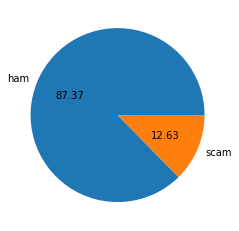

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','scam'],autopct = "%0.2f")
plt.show()

In [23]:
# data is imbalanced that is wrt target

In [24]:
import nltk

In [25]:
df['num_characters']=df['text'].apply(len)

In [26]:
df.head(1)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111


In [27]:
# fetch number of words:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head(1)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24


In [29]:
# fetch number of sentencses:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head(1)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [31]:
df[['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_words,5169.0,18.453279,13.324793,1.0,9.0,15.0,26.0,220.0
num_sentences,5169.0,1.947185,1.362406,1.0,1.0,1.0,2.0,28.0


In [32]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe().T## ham msgs describe

,count,mean,std,min,25%,50%,75%,max
num_characters,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
num_words,4516.0,17.120903,13.493725,1.0,8.0,13.0,22.0,220.0
num_sentences,4516.0,1.799601,1.278465,1.0,1.0,1.0,2.0,28.0


In [33]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe().T##span msg describe wrt cols

,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
num_words,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0
num_sentences,653.0,2.967841,1.483201,1.0,2.0,3.0,4.0,8.0


In [34]:
## spam msgs are quite bigger in words,sent compared to ham

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

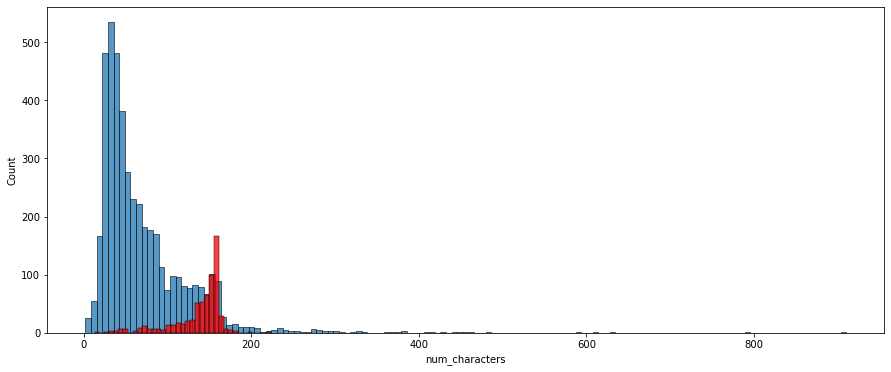

In [35]:
plt.figure(figsize = (15,6))
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'],color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

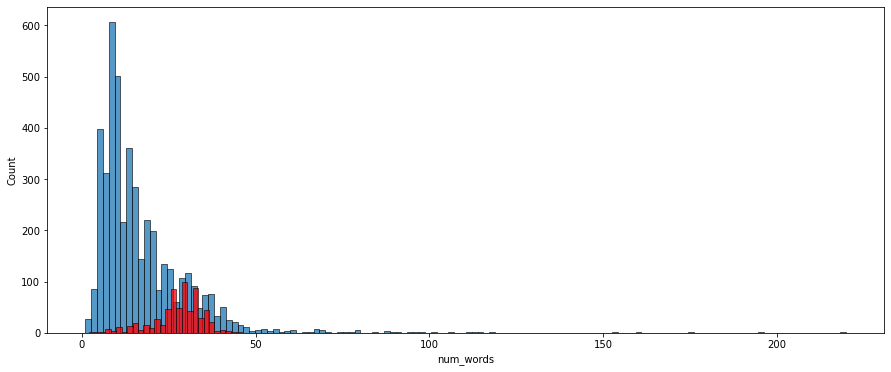

In [36]:
plt.figure(figsize = (15,6))
sns.histplot(df[df['target'] ==0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'],color = 'red')

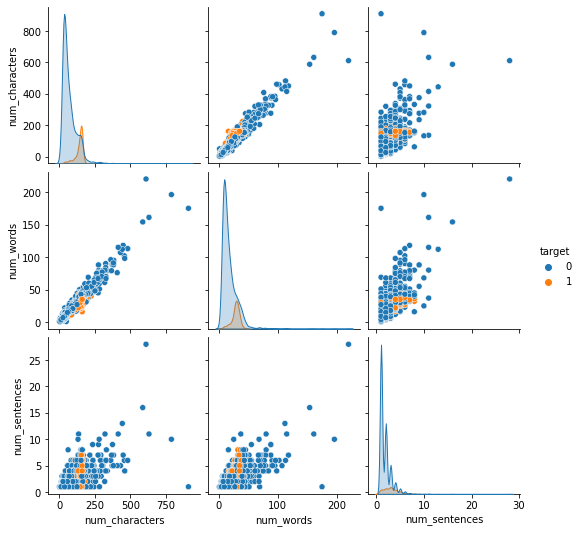

In [37]:
sns.pairplot(df,hue = 'target')

<AxesSubplot:>

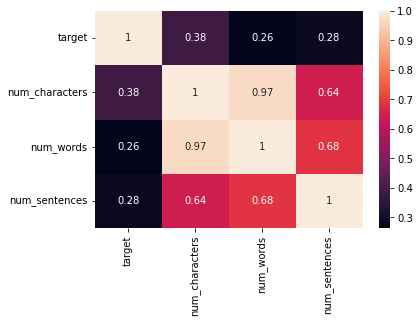

In [38]:
sns.heatmap(df.corr(),annot = True)

In [39]:
# we will keep num_charcters

# 3. Data Preprocessing: 
# Lower case
# tokenization
# remove special characters
# remove stopwards and punctuations
# stemming

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
            
    return " ".join(y)
            
    
    

In [40]:
import string


In [41]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
transform_text("HIIIII How  the HEll are you'd!  digvijay patil ty %% ? @ 4545")

'hiiiii hell digvijay patil ty 4545'

In [46]:
transform_text("Did you like my presentation on ml")

'like present ml'

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [47]:
transform_text("Did you like my presentation on ml but i am loving ml")

'like present ml love ml'

In [48]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [49]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [50]:
df['transformed_text'] =df['text'].apply(transform_text)

In [51]:
df.head(1)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [52]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size=10,background_color='white')

In [53]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

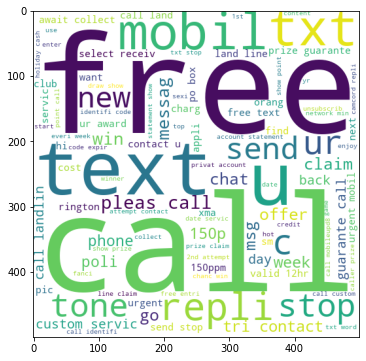

In [54]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

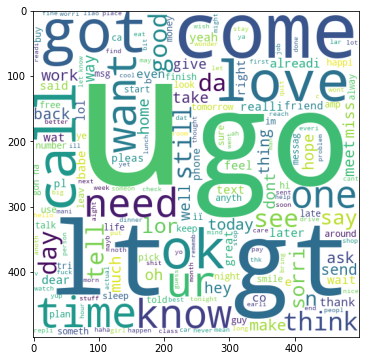

In [55]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        

In [58]:
len(spam_corpus)

9939

C:\Users\urmil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


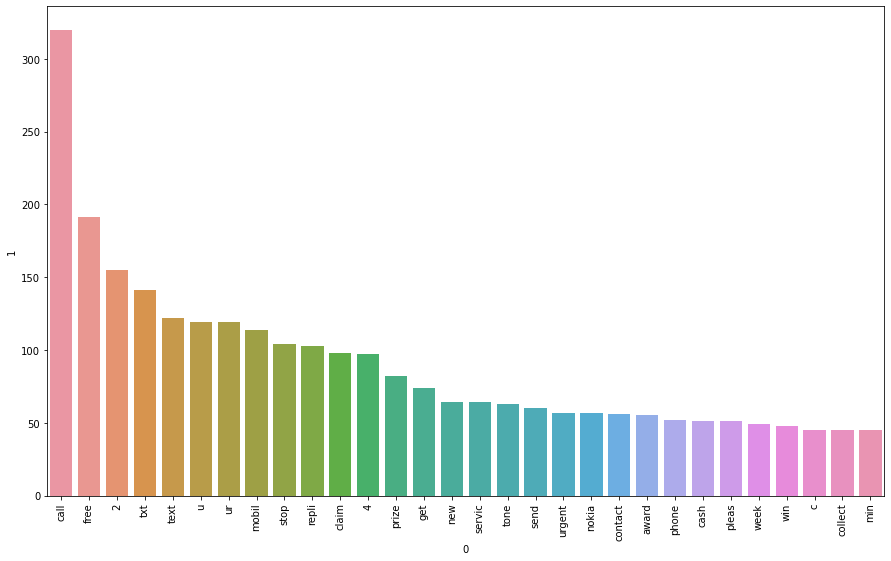

In [59]:
# top 30 most popular spam words:
plt.figure(figsize = (15,9))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [60]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

C:\Users\urmil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


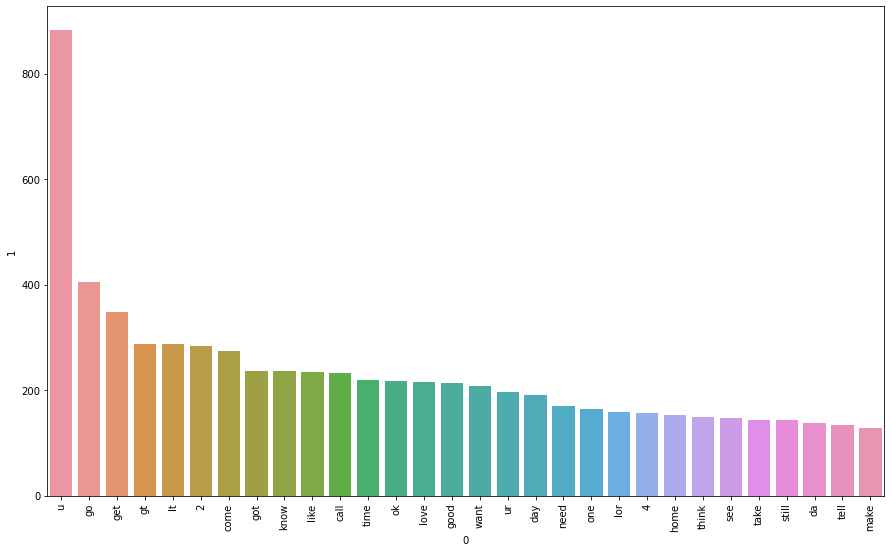

In [61]:
# top 30 most popular words in ham msg:
plt.figure(figsize = (15,9))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [62]:
len(ham_corpus)

35394

# 4. Model Building:

In [63]:
from sklearn.feature_extraction.text  import CountVectorizer,TfidfVectorizer

In [64]:
cv = CountVectorizer()

In [65]:
tfidf = TfidfVectorizer()

In [66]:
df.head(1)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [67]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [68]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
x.shape

(5169, 6708)

In [70]:
y = df['target'].values

In [71]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 2)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [75]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [77]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [78]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [87]:
tfidf = TfidfVectorizer(max_features=3000)
x1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [88]:
x1.shape

(5169, 3000)

In [89]:
y1 = df['target'].values

In [90]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size = 0.20,random_state = 2)

In [91]:
gnb2 = GaussianNB()
mnb2 = MultinomialNB()
bnb2 = BernoulliNB()

In [92]:
gnb2.fit(x_train1,y_train1)
y_pred11 = gnb2.predict(x_test1)
print(accuracy_score(y_test1,y_pred11))
print(confusion_matrix(y_test1,y_pred11))
print(precision_score(y_test1,y_pred11))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [93]:
mnb2.fit(x_train1,y_train1)
y_pred22 = mnb2.predict(x_test1)
print(accuracy_score(y_test1,y_pred22))
print(confusion_matrix(y_test1,y_pred22))
print(precision_score(y_test1,y_pred22))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [94]:
bnb2.fit(x_train1,y_train1)
y_pred33 = bnb2.predict(x_test1)
print(accuracy_score(y_test1,y_pred33))
print(confusion_matrix(y_test1,y_pred33))
print(precision_score(y_test1,y_pred33))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [96]:
# we choose mnb2 tfidf:

# pickle:

In [96]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb2,open('model.pkl','wb'))
